Original Image as Matrix:
 [[241 241 242 ...  64  56  53]
 [240 241 241 ...  66  58  55]
 [240 240 241 ...  69  60  56]
 ...
 [230 235 241 ... 231 231 231]
 [229 234 240 ... 231 231 231]
 [229 234 240 ... 231 231 231]]


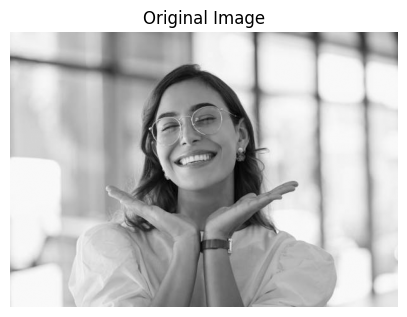

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/girl.jpg"

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

print("Original Image as Matrix:\n", img)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [33]:
def display_image(image, title="Image"):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def weighted_average_filter(image):
    kernel_weighted = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16
    result = cv2.filter2D(image, -1, kernel_weighted)
    print("Original Image as Matrix:\n", image)
    print("------------------------------------------------------------------------")
    print("Matrix after performing masking: \n", result)
    print("------------------------------------------------------------------------")
    display_image(result, "Weighted Average Filter")

def custom_gaussian_filter(image):
    kernel_gaussian = np.array([[1,  4,  7,  4, 1],
                                 [4, 16, 26, 16, 4],
                                 [7, 26, 41, 26, 7],
                                 [4, 16, 26, 16, 4],
                                 [1,  4,  7,  4, 1]]) / 273
    result = cv2.filter2D(image, -1, kernel_gaussian)
    print("Original Image as Matrix:\n", image)
    print("------------------------------------------------------------------------")
    print("Matrix after performing masking: \n", result)
    print("------------------------------------------------------------------------")
    display_image(result, "Custom Gaussian Filter")

def median_filter(image):
    result = cv2.medianBlur(image, 5)
    print("Original Image as Matrix:\n", image)
    print("------------------------------------------------------------------------")
    print("Matrix after performing masking: \n", result)
    print("------------------------------------------------------------------------")
    display_image(result, "Median Filter")

def min_filter(image):
    from scipy.ndimage import minimum_filter
    result = minimum_filter(image, size=3)
    print("Original Image as Matrix:\n", image)
    print("------------------------------------------------------------------------")
    print("Matrix after performing masking: \n", result)
    print("------------------------------------------------------------------------")
    display_image(result, "Min Filter")

def gaussian_smoothing_color(image):
    b, g, r = cv2.split(image)

    b_blurred = cv2.filter2D(b, -1, np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16)
    g_blurred = cv2.filter2D(g, -1, np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16)
    r_blurred = cv2.filter2D(r, -1, np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16)
    print("Blue colour matrix before performing masking: \n", b)
    print("------------------------------------------------------------------------")
    print("Blue colour matrix after performing masking: \n", b_blurred)
    print("------------------------------------------------------------------------")
    print("Green colour matrix before performing masking: \n", g)
    print("------------------------------------------------------------------------")
    print("Green colour matrix after performing masking: \n", g_blurred)
    print("------------------------------------------------------------------------")
    print("Red colour matrix before performing masking: \n", r)
    print("------------------------------------------------------------------------")
    print("Red colour matrix after performing masking: \n", r_blurred)
    print("------------------------------------------------------------------------")

    result = cv2.merge([b_blurred, g_blurred, r_blurred])

    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Colored Image")
    plt.axis('off')
    plt.show()

    print("------------------------------------------------------------------------")
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Gaussian Blurred Colored Image (Channel-wise)")
    plt.axis('off')
    plt.show()


Choose a filter to apply:
1: Weighted Average Filter
2: Custom Gaussian Filter
3: Median Filter
4: Min Filter
5: Gaussian Smoothing (Color Image)
Enter your choice (1-5): 5
------------------------------------------------------------------------
Blue colour matrix before performing masking: 
 [[232 232 233 ...  50  44  41]
 [231 232 232 ...  52  46  43]
 [231 231 232 ...  55  48  44]
 ...
 [232 237 243 ... 242 242 242]
 [231 236 242 ... 245 245 245]
 [231 236 242 ... 245 245 245]]
------------------------------------------------------------------------
Blue colour matrix after performing masking: 
 [[232 232 232 ...  51  46  44]
 [232 232 232 ...  52  47  44]
 [231 231 232 ...  55  49  46]
 ...
 [234 237 242 ... 243 243 243]
 [234 236 242 ... 244 244 244]
 [234 236 242 ... 245 245 245]]
------------------------------------------------------------------------
Green colour matrix before performing masking: 
 [[243 243 244 ...  67  58  55]
 [242 243 243 ...  69  60  57]
 [242 242 243 ... 

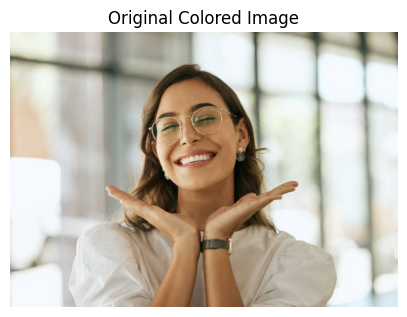

------------------------------------------------------------------------


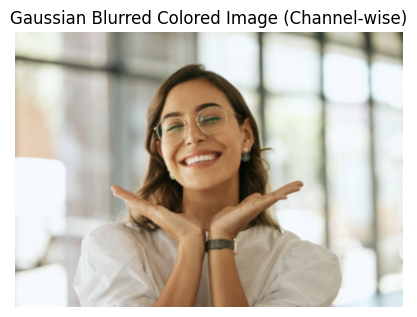

In [34]:
def apply_filter(choice):
    filters = {
        1: weighted_average_filter,
        2: custom_gaussian_filter,
        3: median_filter,
        4: min_filter,
        5: gaussian_smoothing_color
    }

    if choice in filters:
        if choice == 5:
            img_colored = cv2.imread(image_path)
            return filters[choice](img_colored)
        else:
            return filters[choice](img)
    else:
        print("Invalid choice! Please enter a number between 1-5.")

print("Choose a filter to apply:")
print("1: Weighted Average Filter")
print("2: Custom Gaussian Filter")
print("3: Median Filter")
print("4: Min Filter")
print("5: Gaussian Smoothing (Color Image)")
choice = int(input("Enter your choice (1-5): "))
print("------------------------------------------------------------------------")

apply_filter(choice)